# KMeans Clustering — Report Template

This notebook is a parameterized template intended for educational / portfolio use.
It loads a dataset, performs basic preprocessing, runs KMeans clustering,
and produces explanatory visualizations and a short narrative of the results.

Use this notebook as a template and run it with papermill (the application will do this for you).

In [ ]:
# Parameters
import os
from pathlib import Path

workspace_root = Path(os.getcwd()).resolve()
if workspace_root.name == 'notebooks':
    workspace_root = workspace_root.parent

data_path = '../data/synthetic_callcenter_accounts.csv'  # overridden by papermill
out_dir = str(workspace_root/'ml_models')
sample_rows = 50

print(f"Output directory set to: {out_dir}")

In [37]:
ls  C:\Users\DELL\Desktop\aftar-daftar\ml_models

 Volume in drive C has no label.
 Volume Serial Number is 58F1-01F5

 Directory of C:\Users\DELL\Desktop\aftar-daftar\ml_models

10/25/2025  12:27 PM    <DIR>          .
10/25/2025  11:38 AM    <DIR>          ..
10/25/2025  11:04 AM             6,776 generate_reports.py
10/25/2025  09:39 AM             1,012 README.md
07/27/2025  02:33 AM               863 sample_query.py
10/25/2025  12:07 PM           379,528 xgboost_report.html
               4 File(s)        388,179 bytes
               2 Dir(s)  16,056,176,640 bytes free


In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [6]:
# Load data and show basic information
df = pd.read_csv(data_path)
print('Data path:', data_path)
print('Rows, columns:', df.shape)
display(df.head())
display(df.describe(include='all').T)

Data path: ../data/synthetic_callcenter_accounts.csv
Rows, columns: (20000, 11)


,avg_payment_delay,payment_ratio,missed_payments,balance,tenure_months,prior_contact_rate,num_calls_last_30,region,age_bucket,rpc_prob,rpc_label
0,7.181038,0.682037,2,923.76,75,0.329426,1,South,31-45,0.347636,0
1,4.483394,0.440335,2,1199.09,105,0.459299,1,East,18-30,0.285651,1
2,4.146851,0.279677,1,1137.80,84,0.218105,0,East,18-30,0.205233,0
3,4.146907,0.768410,3,4229.92,45,0.457276,2,Central,31-45,0.027628,0
4,13.949143,0.567862,0,1778.25,34,0.234430,4,West,31-45,0.137533,0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
avg_payment_delay,20000.0,NaN,NaN,NaN,6.011718,4.246568,0.01657,2.877746,5.047537,8.106237,41.083976
payment_ratio,20000.0,NaN,NaN,NaN,0.695275,0.189454,0.0,0.564577,0.700872,0.837513,1.0
missed_payments,20000.0,NaN,NaN,NaN,1.199,1.089706,0.0,0.0,1.0,2.0,7.0
balance,20000.0,NaN,NaN,NaN,1495.950638,1506.211687,0.09,425.7425,1032.81,2063.5525,14174.85
tenure_months,20000.0,NaN,NaN,NaN,60.4959,34.812871,1.0,30.0,60.0,91.0,120.0
prior_contact_rate,20000.0,NaN,NaN,NaN,0.284161,0.158929,0.002205,0.160495,0.262638,0.387236,0.890822
num_calls_last_30,20000.0,NaN,NaN,NaN,2.00625,1.424996,0.0,1.0,2.0,3.0,10.0
region,20000,5,North,5071,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_bucket,20000,4,31-45,7971,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rpc_prob,20000.0,NaN,NaN,NaN,0.333357,0.204282,0.000001,0.152865,0.342791,0.500133,0.850292


## Data description and ML context

- Explain the dataset (columns, target or interest variables).
- For clustering we do not use a target; we look for natural groups in numeric features.
- KMeans is an unsupervised algorithm that partitions data into K groups by minimizing within-cluster variance.
- Typical preprocessing: handle missing values, scale numeric features, and consider feature selection.

In [7]:
# Basic preprocessing: select numeric features and fill missing values
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) == 0:
    raise ValueError('No numeric columns found for clustering.')
X = df[num_cols].fillna(0)
print('Numeric columns used for clustering:', num_cols)

Numeric columns used for clustering: ['avg_payment_delay', 'payment_ratio', 'missed_payments', 'balance', 'tenure_months', 'prior_contact_rate', 'num_calls_last_30', 'rpc_prob', 'rpc_label']


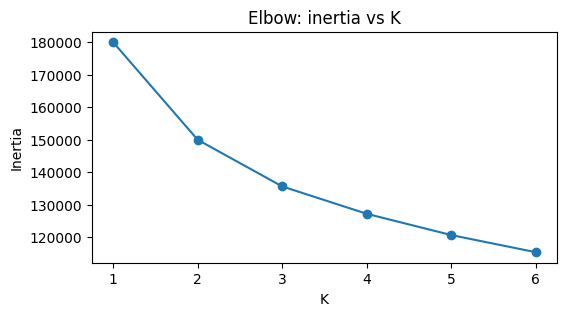

In [8]:
# Choose K (elbow method) — small sweep for demonstration
inertias = []
K_range = range(1,7)
for k in K_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(StandardScaler().fit_transform(X))
    inertias.append(km.inertia_)
plt.figure(figsize=(6,3))
plt.plot(list(K_range), inertias, marker='o')
plt.xlabel('K'); plt.ylabel('Inertia'); plt.title('Elbow: inertia vs K')
plt.show()

# For this template pick K=3 by default (adjust as needed)
K = 3

Cluster counts:


cluster
0    6589
1    5784
2    7627
Name: count, dtype: int64

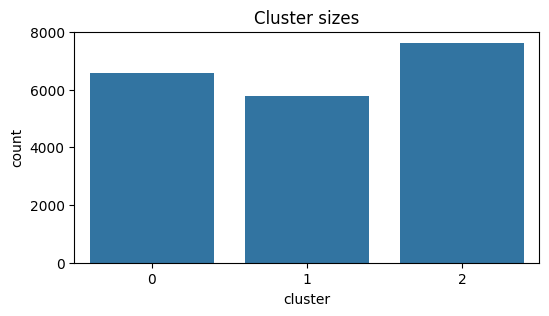

--- Cluster 0 sample rows ---


,avg_payment_delay,payment_ratio,missed_payments,balance,tenure_months,prior_contact_rate,num_calls_last_30,region,age_bucket,rpc_prob,rpc_label,cluster
1,4.483394,0.440335,2,1199.09,105,0.459299,1,East,18-30,0.285651,1,0
7,7.409443,0.749868,2,641.15,115,0.687280,1,South,46-60,0.549731,1,0
11,6.318497,0.818886,0,52.15,94,0.278662,4,South,18-30,0.690256,1,0
20,8.910180,1.000000,0,900.35,22,0.461656,2,West,46-60,0.513695,1,0
21,1.605544,0.757567,0,98.48,39,0.377209,1,South,18-30,0.684654,1,0
23,5.801851,0.808921,0,1861.87,41,0.302925,1,North,46-60,0.237445,1,0
24,8.440061,0.850063,2,403.62,73,0.044175,1,North,46-60,0.441309,1,0
26,4.565338,0.735424,1,394.36,98,0.189442,3,Central,31-45,0.555069,1,0
27,3.922144,0.900774,1,1686.06,19,0.232791,1,West,18-30,0.263086,1,0
28,3.419729,1.000000,3,239.08,21,0.249819,1,East,18-30,0.609382,1,0


--- Cluster 1 sample rows ---


,avg_payment_delay,payment_ratio,missed_payments,balance,tenure_months,prior_contact_rate,num_calls_last_30,region,age_bucket,rpc_prob,rpc_label,cluster
3,4.146907,0.768410,3,4229.92,45,0.457276,2,Central,31-45,0.027628,0,1
4,13.949143,0.567862,0,1778.25,34,0.234430,4,West,31-45,0.137533,0,1
8,5.996881,0.780515,2,2408.72,81,0.221648,3,East,31-45,0.129339,0,1
9,0.647745,0.739778,1,3204.71,95,0.317070,3,North,31-45,0.098980,0,1
10,2.013727,0.560894,1,4408.23,55,0.108259,1,North,31-45,0.015277,0,1
17,3.953224,0.818734,0,2308.42,24,0.156578,0,East,60+,0.137041,0,1
18,4.947907,0.732644,1,2854.12,89,0.112822,7,North,31-45,0.105380,0,1
22,1.418380,0.731485,3,2005.36,32,0.435066,1,West,18-30,0.195661,0,1
25,5.693507,0.432823,1,1959.32,46,0.441037,1,Central,18-30,0.148192,0,1
29,10.313398,0.704038,4,3650.71,104,0.294153,2,South,46-60,0.024989,0,1


--- Cluster 2 sample rows ---


,avg_payment_delay,payment_ratio,missed_payments,balance,tenure_months,prior_contact_rate,num_calls_last_30,region,age_bucket,rpc_prob,rpc_label,cluster
0,7.181038,0.682037,2,923.76,75,0.329426,1,South,31-45,0.347636,0,2
2,4.146851,0.279677,1,1137.80,84,0.218105,0,East,18-30,0.205233,0,2
5,8.600119,0.339819,1,938.62,42,0.573541,2,South,31-45,0.301398,0,2
6,3.393234,0.591192,0,1868.96,85,0.757770,2,South,31-45,0.322820,0,2
12,13.095531,0.695913,1,512.53,80,0.334789,0,East,60+,0.382640,0,2
13,4.175557,0.524752,3,271.10,36,0.128042,1,North,18-30,0.399128,0,2
14,3.174082,0.476578,0,1648.40,37,0.346251,2,Central,31-45,0.228805,0,2
15,5.442023,0.739259,3,442.56,62,0.453375,4,North,46-60,0.557645,0,2
16,3.015853,0.873794,0,930.64,8,0.165012,0,Central,46-60,0.425706,0,2
19,1.920412,0.826677,1,1392.29,9,0.192620,0,West,18-30,0.296890,0,2


In [9]:
# Run KMeans and inspect clusters
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
km = KMeans(n_clusters=K, n_init=50, random_state=42)
labels = km.fit_predict(Xs)
df['cluster'] = labels
print('Cluster counts:')
display(df['cluster'].value_counts().sort_index())

# Plot cluster sizes
plt.figure(figsize=(6,3))
sns.countplot(x='cluster', data=df)
plt.title('Cluster sizes')
plt.show()

# Show sample rows per cluster
for c in sorted(df['cluster'].unique()):
    print(f'--- Cluster {c} sample rows ---')
    display(df[df['cluster']==c].head(int(sample_rows/len(df['cluster'].unique()))))

## Interpretation and importance

- Describe what the clusters mean in the business context (e.g., agent segments, customer types).
- Explain limitations: KMeans assumes spherical clusters and requires scaling; results depend on features chosen.
- For portfolio/reading: highlight why preprocessing and feature selection matter, and how clustering results can inform downstream modeling or business rules.

## Generate HTML Report

The following cell will generate an HTML report from this notebook and save it in the `ml_models` directory.

In [ ]:
# Generate HTML report
import os
import sys
from pathlib import Path
import nbformat
from nbconvert import HTMLExporter
from datetime import datetime
import warnings

try:
    warnings.filterwarnings('ignore', category=UserWarning)
    
    notebook_name = 'kmeans_template.ipynb'
    notebook_path = str(workspace_root/'notebooks'/notebook_name)  
    
    print(f"Found notebook at: {notebook_path}")
    print(f"Output directory: {out_dir}")
    
    if not os.path.exists(notebook_path):
        print(f"WARNING: Notebook not found at {notebook_path}")
        notebook_path = str(Path(__file__).parent/notebook_name)
       
    os.makedirs(out_dir, exist_ok=True)
    
    with open(notebook_path, 'r', encoding='utf-8') as f:
        current = nbformat.read(f, as_version=4)

    html_exporter = HTMLExporter()
    html_exporter.template_name = 'classic'
    
    body, _ = html_exporter.from_notebook_node(current)
   
    output_file = os.path.join(out_dir, 'kmeans_report.html')
    with open(output_file, 'w', encoding='utf-8') as f:
        f.write(body)
            
except Exception as e:
    print(f"Current working directory: {os.getcwd()}")
    print(f"Error: {str(e)}")
    
    try:
        if os.path.exists(out_dir):
            print(os.listdir(out_dir))
        else:
            print(f"Output directory does not exist: {out_dir}")
    except Exception as dir_error:
        print(f"Error listing directory: {str(dir_error)}")

Found notebook at: C:\Users\DELL\Desktop\aftar-daftar\notebooks\kmeans_template.ipynb
Output directory: C:\Users\DELL\Desktop\aftar-daftar\ml_models
